In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import random
import shutil
import os
from tqdm import tqdm

from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import add,Dense,Input,Flatten,Dropout
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

from tensorflow.keras.applications.inception_v3 import InceptionV3

In [16]:
data = ImageDataGenerator(rescale=1.0/255.0,
                         horizontal_flip=True,
                         height_shift_range=0.2,
                         width_shift_range=0.2,
                         shear_range=0.2,
                         zoom_range=0.2,
                         validation_split=0.1,
                         )

In [17]:
train = data.flow_from_directory('/kaggle/input/indian-food-classification/Food Classification',
                                class_mode='categorical',
                                target_size=(224,224),
                                subset='training')
test = data.flow_from_directory('/kaggle/input/indian-food-classification/Food Classification',
                                class_mode='categorical',
                                target_size=(224,224),
                                subset='validation')

Found 5651 images belonging to 20 classes.
Found 618 images belonging to 20 classes.


In [18]:
model = InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [21]:
for layer in model.layers:
    layer.trainable = False

last_layer = model.get_layer('mixed7')

print("Last layer output shape:", last_layer.output.shape)

output = last_layer.output

Last layer output shape: (None, 12, 12, 768)


In [22]:
num_classes = train.num_classes
print(num_classes)

20


In [23]:
x = layers.GlobalAveragePooling2D()(output)
x = layers.Dense(1024,activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(num_classes,activation='softmax')(x)

model = Model(model.input,x)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 9,783,220 (37.32 MB)

 Trainable params: 807,956 (3.08 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [24]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
def step_decay(epoch):
    initial_alpha = 0.01
    factor = 0.5
    drop_every_epoch = 5
    alpha = initial_alpha * (factor ** np.floor((1+epoch) / drop_every_epoch))
    return float(alpha)

callbacks = [LearningRateScheduler(step_decay)]

In [25]:
history = model.fit(train,validation_data = test,epochs = 20,verbose = 1)

Epoch 1/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 160s 856ms/step - accuracy: 0.3312 - loss: 2.3886 - val_accuracy: 0.8269 - val_loss: 0.7938
Epoch 2/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 142s 803ms/step - accuracy: 0.7200 - loss: 1.0374 - val_accuracy: 0.8851 - val_loss: 0.4949
Epoch 3/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 143s 811ms/step - accuracy: 0.7838 - loss: 0.7967 - val_accuracy: 0.8981 - val_loss: 0.3858
Epoch 4/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 140s 793ms/step - accuracy: 0.8055 - loss: 0.6837 - val_accuracy: 0.9207 - val_loss: 0.2994
Epoch 5/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 144s 813ms/step - accuracy: 0.8149 - loss: 0.6484 - val_accuracy: 0.9207 - val_loss: 0.2758
Epoch 6/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 142s 805ms/step - accuracy: 0.8323 - loss: 0.5876 - val_accuracy: 0.9256 - val_loss: 0.2697
Epoch 7/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 143s 807ms/step - accuracy: 0.8419 - loss: 0.5384 - val_accuracy: 0.9223 - val_loss: 0.2547
Epoch 8/20
177/177 ━━━━━━━━━━━━━━━━━━━━ 146s 823ms/step - accuracy: 0.8434 -

In [26]:
model.save('IndianFoodClassification.h5')

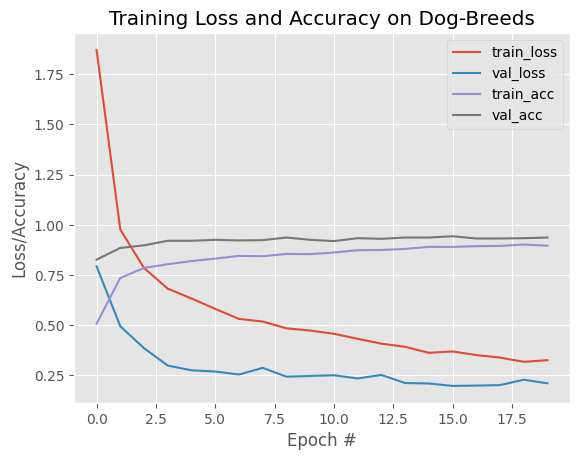

In [27]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dog-Breeds")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [30]:
loaded_model = load_model('/kaggle/working/IndianFoodClassification.h5')

In [33]:
from tensorflow.keras.preprocessing import image

def predict_and_display(model, class_labels, img_path, true_class=None):
    img = image.load_img(img_path, target_size=(224, 224))

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]

    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence_level = np.max(predictions)

    predicted_class_name = class_labels[predicted_class]

    plt.imshow(img)
    plt.axis('off')

    if true_class:
        plt.title(f'Predicted Class: {predicted_class_name}, True Class: {true_class}')
    else:
        plt.title(f'Predicted Class: {predicted_class_name}')
    plt.show()

In [34]:
class_labels = ['burger','butter_naan','chai','chapati','chole_bhature',
                'dal_makhani','dhokla','fried_rice','idli','jalebi','kaathi_rolls',
                'kadai_paneer','kulfi','masala_dosa','momos','paani_puri','pakode','pav_bhaji',
                'pizza','samosa']

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


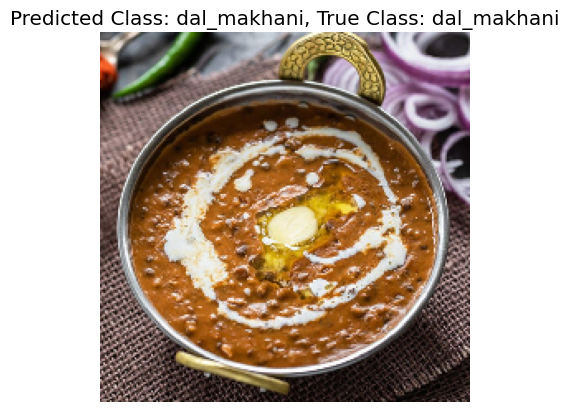

In [35]:
predict_and_display(model, class_labels, '/kaggle/input/indian-food-classification/Food Classification/dal_makhani/001.jpg', true_class='dal_makhani')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


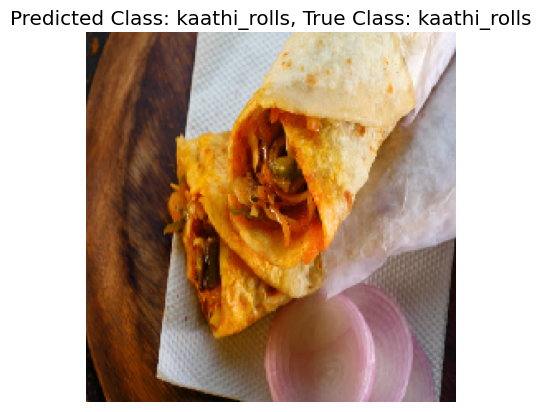

In [36]:
predict_and_display(model, class_labels, '/kaggle/input/kathi-roll/gettyimages-1400256629-612x612.jpg', true_class='kaathi_rolls')